In [1]:
import numpy as np
import pandas as pd

data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False)
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207576 entries, 0 to 3207575
Data columns (total 46 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   vin                       object 
 1   collect_ts                int64  
 2   uuid                      object 
 3   model_name                object 
 4   series_code               object 
 5   msg_create_time           object 
 6   vcu_VehicleMode           float32
 7   vcu_vehicleSpeed          float32
 8   VCU_VehicleSpeedValid     float32
 9   vcu_state                 float32
 10  bms_SOC                   float32
 11  bms_state                 float32
 12  BCM_ebs_U_BATT            float32
 13  BCM_ebs_SOC               float32
 14  BCM_ebs_SOH_SUL           float32
 15  BCM_ebs_SOC_STATE         float32
 16  BCM_ebs_SOH_SUL_STATE     float32
 17  bcm_12VBatterySOC         float32
 18  dcdc_realOutputVoltage    float32
 19  dcdc_realOutputCurrent    float32
 20  DCDC_AlerState          

In [ ]:
data_raw.head(20)

In [4]:
# 填充操作
data= data_raw[data_raw.vin == 'LM8F7D891NA000192'].fillna(method='bfill').sort_values(by="collect_ts")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75670 entries, 2138304 to 1080228
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       75670 non-null  object 
 1   collect_ts                75670 non-null  int64  
 2   uuid                      75670 non-null  object 
 3   model_name                75670 non-null  object 
 4   series_code               75670 non-null  object 
 5   msg_create_time           75670 non-null  object 
 6   vcu_VehicleMode           75670 non-null  float32
 7   vcu_vehicleSpeed          75670 non-null  float32
 8   VCU_VehicleSpeedValid     75670 non-null  float32
 9   vcu_state                 75670 non-null  float32
 10  bms_SOC                   75670 non-null  float32
 11  bms_state                 75670 non-null  float32
 12  BCM_ebs_U_BATT            75670 non-null  float32
 13  BCM_ebs_SOC               75670 non-null  float32
 14  BCM

In [5]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75670 entries, 2138304 to 1080228
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       75670 non-null  object 
 1   collect_ts                75670 non-null  int64  
 2   uuid                      75670 non-null  object 
 3   model_name                75670 non-null  object 
 4   series_code               75670 non-null  object 
 5   msg_create_time           75670 non-null  object 
 6   vcu_VehicleMode           75670 non-null  float32
 7   vcu_vehicleSpeed          75670 non-null  float32
 8   VCU_VehicleSpeedValid     75670 non-null  float32
 9   vcu_state                 75670 non-null  float32
 10  bms_SOC                   75670 non-null  float32
 11  bms_state                 75670 non-null  float32
 12  BCM_ebs_U_BATT            75670 non-null  float32
 13  BCM_ebs_SOC               75670 non-null  float32
 14  BCM

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [7]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest,esc_vehicleSpeed,esc_vehicleSpeedValid,ac_ambientTemp,ac_ambientTempValid,vcu_highVoltageIndicator,bcm_HvOffRequest,BCM_EBS_State
date,,,,,,,,,,,,,,,,,,,,,
2023-04-02 04:19:12.266,LM8F7D891NA000192,1680409152266,LM8F7D891NA000192#1682451973919#178,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682451973881,1.0,0.0,0.0,0.0,...,205.0,-139.75,0.0,0.000000,1.0,24.5,1.0,1.0,0.0,0.0
2023-04-02 04:19:13.266,LM8F7D891NA000192,1680409153266,LM8F7D891NA000192#1682451973919#178,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682451973881,1.0,0.0,0.0,0.0,...,205.0,-139.75,0.0,0.000000,1.0,24.5,1.0,1.0,0.0,0.0
2023-04-02 04:19:14.266,LM8F7D891NA000192,1680409154266,LM8F7D891NA000192#1682451973919#178,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682451973881,1.0,0.0,0.0,0.0,...,205.0,-139.75,0.0,0.000000,1.0,24.5,1.0,1.0,0.0,0.0
2023-04-02 04:19:15.266,LM8F7D891NA000192,1680409155266,LM8F7D891NA000192#1682451973919#178,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682451973881,1.0,0.0,0.0,0.0,...,205.0,-139.75,0.0,0.000000,1.0,24.5,1.0,1.0,0.0,0.0
2023-04-02 04:19:16.266,LM8F7D891NA000192,1680409156266,LM8F7D891NA000192#1682451973919#178,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682451973881,1.0,0.0,0.0,0.0,...,205.0,-139.75,0.0,0.000000,1.0,24.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25 07:27:09.951,LM8F7D891NA000192,1682407629951,LM8F7D891NA000192#1682435938812#4743,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682435938771,1.0,0.0,0.0,0.0,...,158.0,-125.00,0.0,0.000000,1.0,21.0,1.0,1.0,0.0,0.0
2023-04-25 07:27:10.951,LM8F7D891NA000192,1682407630951,LM8F7D891NA000192#1682435938812#4743,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682435938771,1.0,0.0,0.0,0.0,...,158.0,-125.00,0.0,0.000000,1.0,21.0,1.0,1.0,0.0,0.0
2023-04-25 07:27:10.951,LM8F7D891NA000192,1682407630951,LM8F7D891NA000192#1682435938806#9887,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682435938771,1.0,0.0,0.0,0.0,...,158.0,-125.00,0.0,0.000000,1.0,21.0,1.0,1.0,0.0,0.0


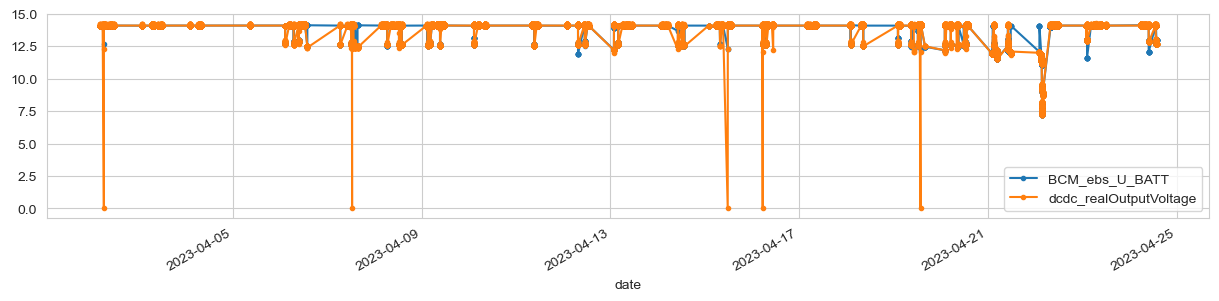

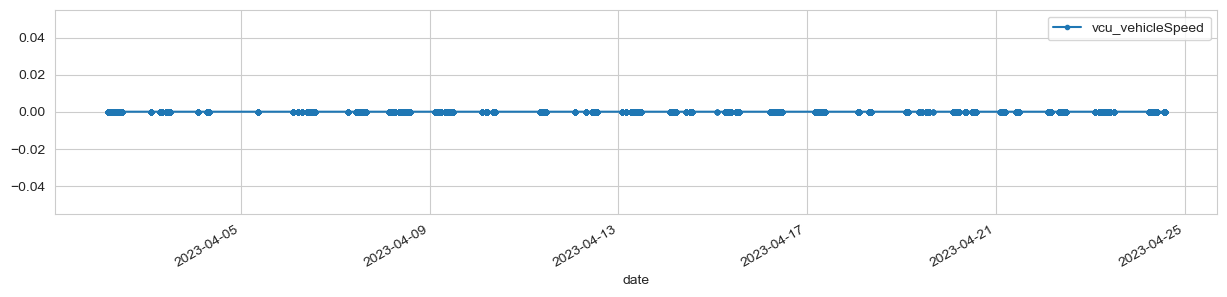

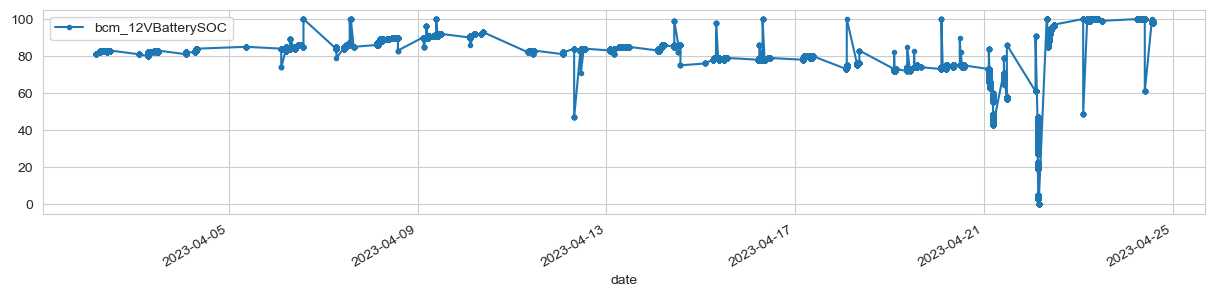

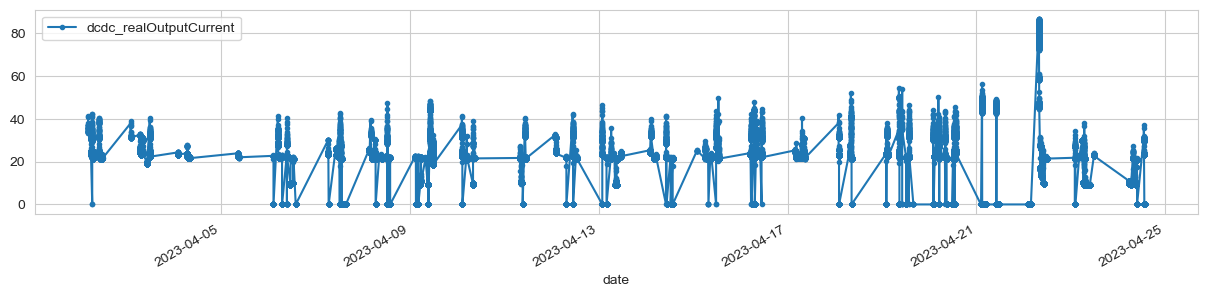

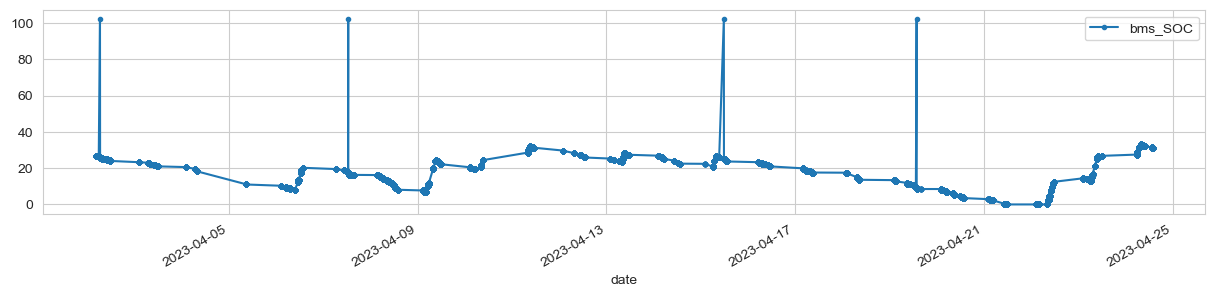

In [8]:
import matplotlib.pyplot as plt

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_12VBatterySOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

1. DC-DC 有输出的前提是高压上电
2. 当 DC-DC 有输出时，小电瓶电压会很快和其保持一致
3.

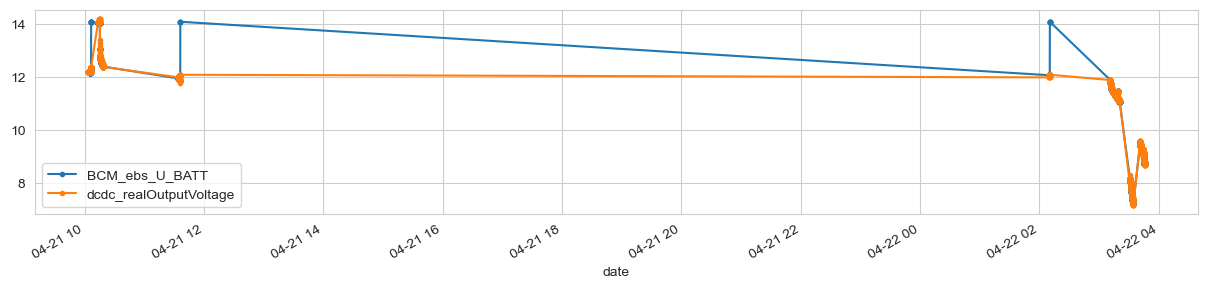

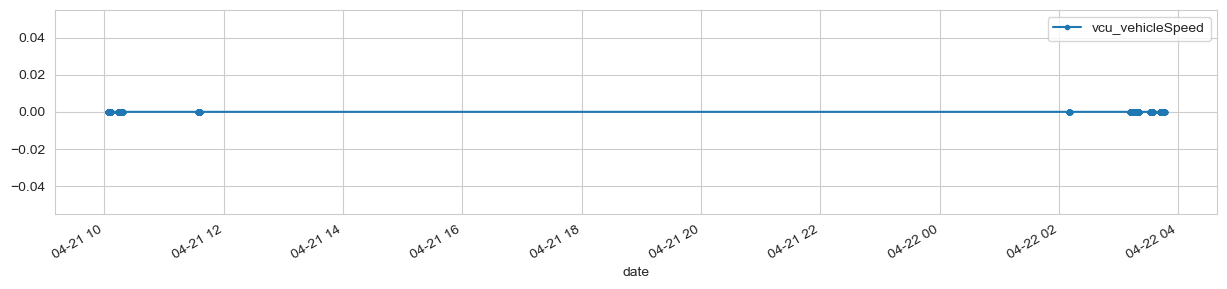

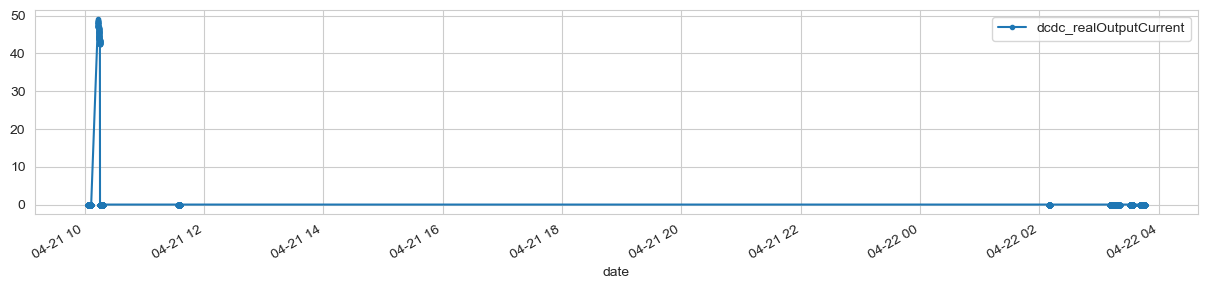

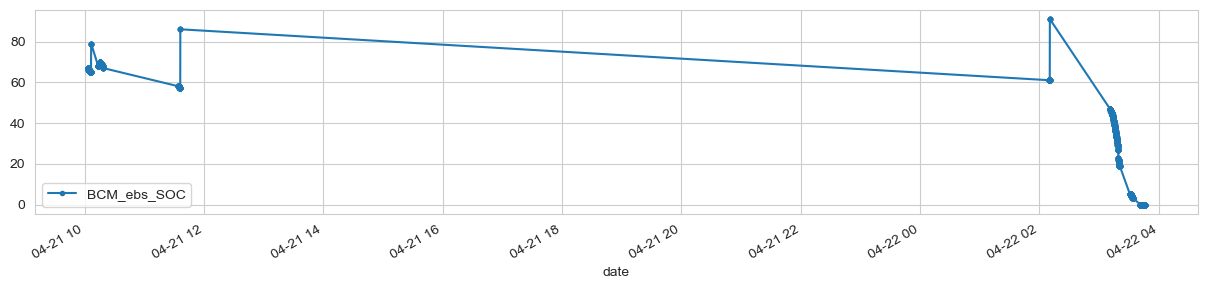

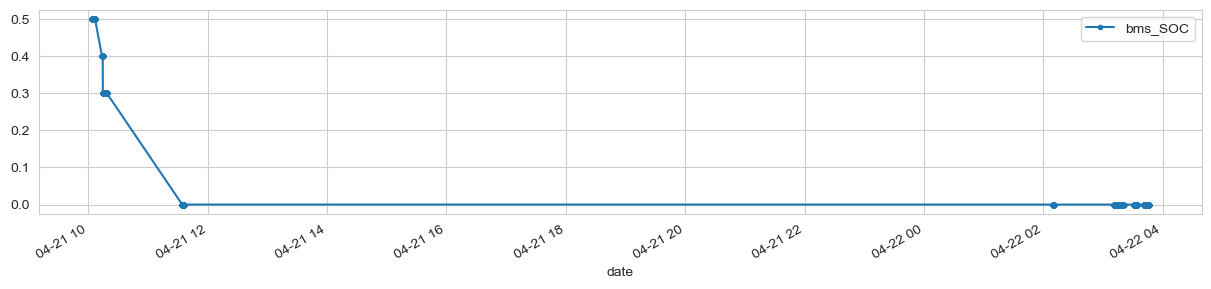

In [9]:
import matplotlib.pyplot as plt

data_copy["2023-04-21 10:00:00":"2023-04-22 04:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-21 10:00:00":"2023-04-22 04:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-21 10:00:00":"2023-04-22 04:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-21 10:00:00":"2023-04-22 04:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-21 10:00:00":"2023-04-22 04:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

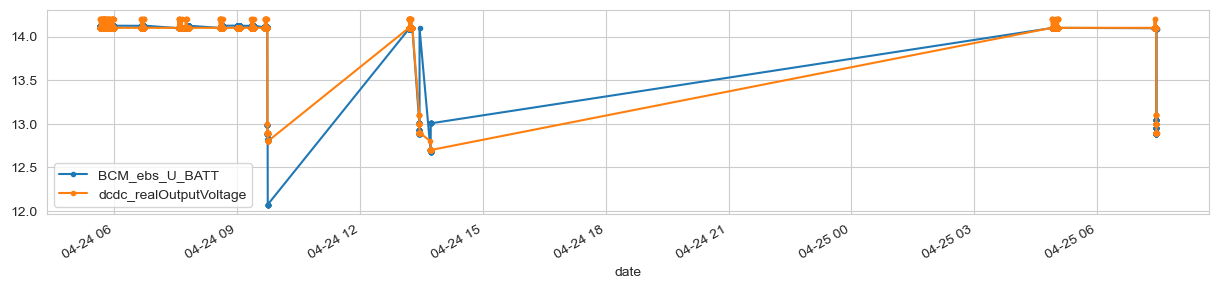

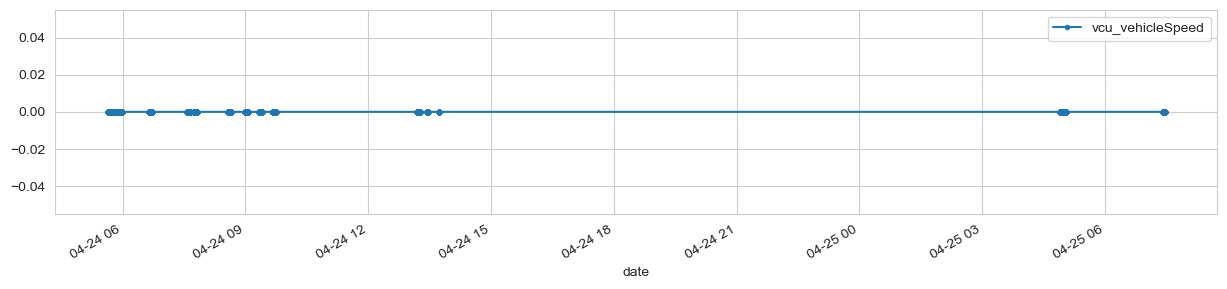

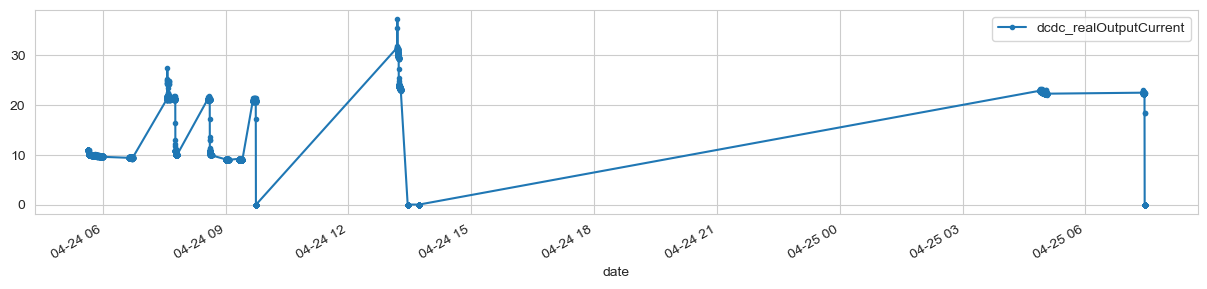

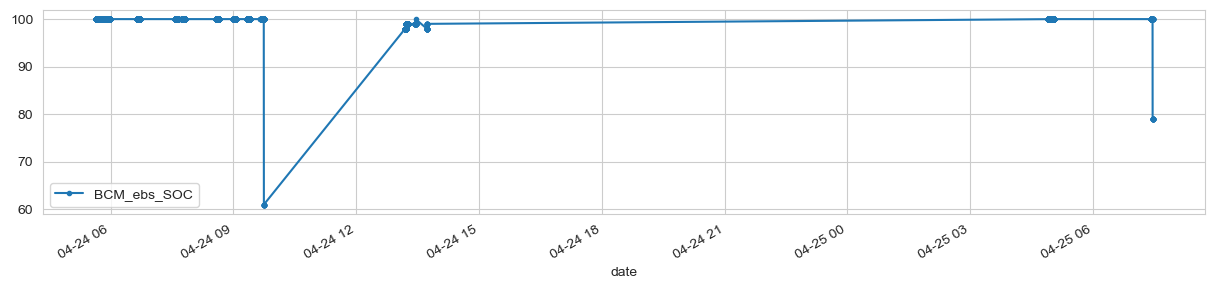

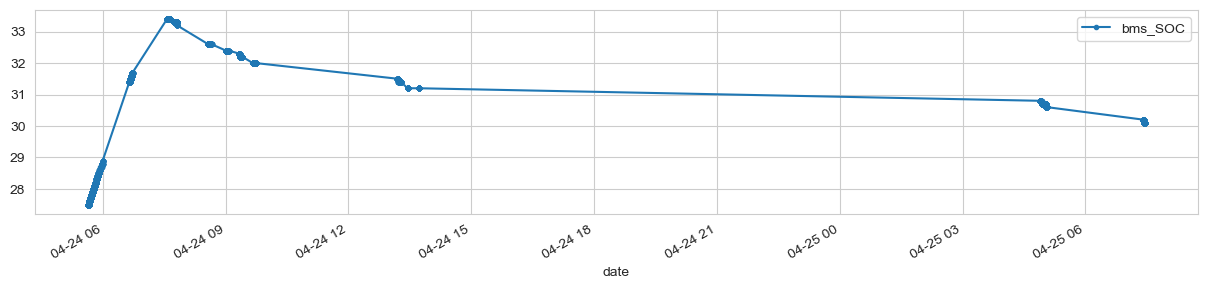

In [10]:
import matplotlib.pyplot as plt

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()